In [71]:
import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt
import networkx.algorithms.bipartite as bipartite

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1.Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

2.Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat

3.Python code to create dataset:https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

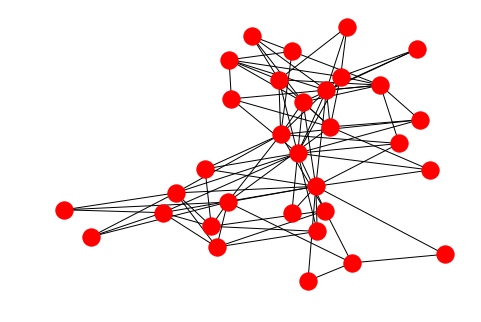

In [72]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))
%matplotlib inline
nx.draw(G)
plt.show()

What can you infer about the relationships between (1) the women, and (2) the social events?  

## 1. Affliation Network

Connection strength and node similarity of Womens based on Social Events

### Draw Afflication network of women

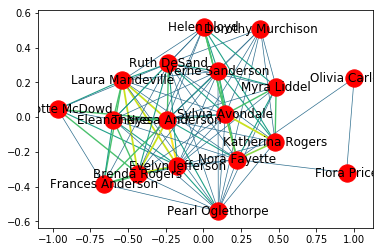

In [73]:
womennet=bipartite.weighted_projected_graph(G, women, ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in womennet.edges(data=True)]
nx.draw_networkx(womennet,width=weights, edge_color=weights)

### Top 5 strong women relationships are 

In [74]:
for a, b, data in sorted(womennet.edges(data=True), key=lambda x: x[2]['weight'], reverse = True)[0:5]:
    print('{a} {b} {w}'.format(a=a, b=b, w=data['weight']))

Evelyn Jefferson Theresa Anderson 7
Evelyn Jefferson Brenda Rogers 6
Evelyn Jefferson Laura Mandeville 6
Laura Mandeville Brenda Rogers 6
Laura Mandeville Theresa Anderson 6


### Draw Afflication network of clubs


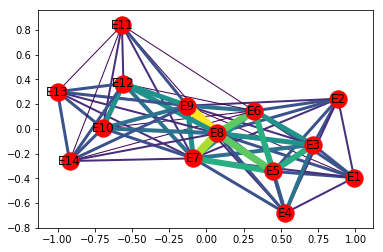

In [75]:
clubnet=bipartite.weighted_projected_graph(G, clubs, ratio=False)
weights=[edata['weight'] for f,t,edata in clubnet.edges(data=True)]
nx.draw_networkx(clubnet,width=weights, edge_color=weights)

In [76]:
In the above two graphs think lines thickness signifies strength of relationship.  

SyntaxError: invalid syntax (<ipython-input-76-3f4dfeccdd1e>, line 1)

### Top 5 club relationships are 

In [ ]:
for a, b, data in sorted(clubnet.edges(data=True), key=lambda x: x[2]['weight'], reverse = True)[0:5]:
    print('{a} {b} {w}'.format(a=a, b=b, w=data['weight']))

## 2. Candidate Network

In [ ]:
annet=bi.weighted_projected_graph(g, candidates, ratio=False)
cannet=net.connected_component_subgraphs(cannet)[0]
weights=[math.log(edata['weight']) for f,t,edata in cannet.edges(data=True)]
net.draw_networkx(cannet,width=weights, edge_color=weights)

## 3. Womens with highest participation

In [ ]:
edeg = nx.degree(womennet)
for key, value in sorted(edeg,reverse=True)[0:5]:
    print(key,value)

## 4. Events with highest participation

In [ ]:
edeg = nx.degree(clubnet)
for key, value in sorted(edeg,reverse=True)[0:5]:
    print(key,value)

Conclusion: From the analysis we caninfer about the strength of participation of women, number of women have conneciton common, strength of clubs connection, number of events clubs holds.

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.
You may work in a small group on this project. Remember to include a video with your submission.